In [9]:
import random as rn
from deap import base
from deap import creator
from deap import tools
from deap import algorithms


In [12]:
#create the modified random function for the initialization of the 
#individuals in the domain space <-5,5>
def randDomain():
    return 5-rn.random()*10

In [13]:
randDomain()

4.189960538237757

In [85]:
def powerFunction(tab):
     return 100 - sum([x*x for x in tab]),

    
    

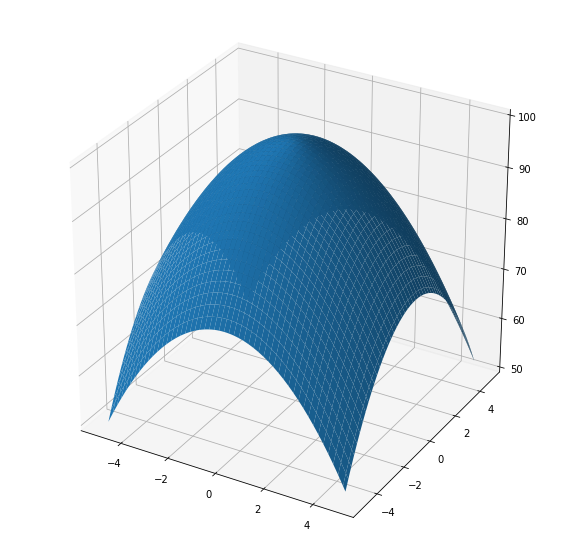

In [24]:
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig3D = plt.figure()
fig3D.set_figwidth(10)
fig3D.set_figheight(10)
ax = plt.axes(projection='3d')
x = y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
zs = np.array(powerFunction([np.ravel(X), np.ravel(Y)]))
Z = zs.reshape(X.shape)
ax.plot_surface(X,Y,Z)
plt.show()


In [76]:
#Dimension number (number of the attributes)
IND_SIZE = 2
#Create type for maximization of the function
creator.create("FitnessMax",base.Fitness,weights=(1.0,))
#Create type for store individual (in this example we use list) 
creator.create("Individual", list, fitness=creator.FitnessMax)


C:\Users\Student\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\Student\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [77]:
#Create toolbox for register needed functions
toolbox = base.Toolbox()
#Register function used for the initialization content of the 
#individual (for the benchmark function are the real values)
toolbox.register("attribute_float",randDomain)
#Register function used for the init Population of the individuals
toolbox.register("individual", tools.initRepeat,creator.Individual, toolbox.attribute_float, n=IND_SIZE)
#Register function for the creating population of individuals
toolbox.register("population",tools.initRepeat, list,toolbox.individual)


In [26]:
#Testing the registered function (look at the content of the 
#individual)
ind1 = toolbox.individual()
ind1


[-2.5855829746075205, -2.657603357311265]

In [27]:
pop = toolbox.population(n=50)
pop

[[1.7263980199335105, 0.1963999393801208],
 [3.1168642788466263, -4.913603993636732],
 [-2.648870486199665, -2.8488110761204997],
 [-3.504543464326197, -0.46105922093684715],
 [3.2361989803305913, 0.0732884942247205],
 [2.9873945257052217, 2.903517826383182],
 [4.293106382320731, 0.05201371032896063],
 [1.9471361728994396, 3.5245306667470544],
 [-4.444484648189821, -1.2745942783353232],
 [-4.101962585283992, -2.44630560040442],
 [4.251118803701606, -4.962386359342888],
 [-1.6973497778260684, 0.9815993917623844],
 [-4.995745981777937, 2.9675113687045993],
 [3.0710240353945126, 4.568408493838778],
 [2.2404516648047035, 0.6262975799598012],
 [-2.989515061006638, 2.933203604404931],
 [2.4212585690325894, 2.4026892601288186],
 [-4.021663053761436, -1.4343005026559705],
 [-3.1223924761013038, 2.119159920494643],
 [0.5577606411933624, -2.397782059956249],
 [-0.4560233003921841, 0.7553628845535174],
 [0.8323845600524402, 3.003107360122695],
 [4.836176302963729, -0.1346748904912678],
 [2.349820

In [89]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate",tools.mutGaussian, mu=0, sigma=5, 
indpb=0.1)
toolbox.register("select",tools. selRoulette) #, tournsize=3)
toolbox.register("evaluate",powerFunction)

In [90]:
def GA_ALG(CXPB,MUTPB,N,NGEN):
        pop = toolbox.population(n=N) #(1)
        # Evaluate the entire population #(2)
         # Create maping
        fitnesses = map(toolbox.evaluate, pop)
         # And evaluate each
        for ind, fit in zip(pop, fitnesses):
            ind.fitness.values = fit

         #Loop over generations
        for g in range(NGEN):
        # Select the next generation individuals
                offspring = toolbox.select(pop, len(pop)) #(3)
                # Clone the selected individuals
                offspring_map = map(toolbox.clone, offspring)
                offspring = ([x for x in offspring_map])
         # Apply crossover and mutation on the offspring #(4)
                for child1, child2 in zip(offspring[::2], offspring[1::2]):
                    if random.random() < CXPB:
                        toolbox.mate(child1, child2)
                        del child1.fitness.values #for evaluate
                        del child2.fitness.values #for evaluate
                for mutant in offspring:
                    if random.random() < MUTPB:
                            toolbox.mutate(mutant)
                            del mutant.fitness.values #for evaluate
                    # Evaluate the individuals with an invalid fitness #(2)
                    # Select part for evaluate
                invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
                     # Create maping
                fitnesses = map(toolbox.evaluate, invalid_ind)
                 # And evaluate each
                for ind, fit in zip(invalid_ind, fitnesses):
                    ind.fitness.values = fit
        # The population is entirely replaced by the offspring
                pop[:] = offspring
        return pop

In [91]:
pop = GA_ALG(0.5,0.2,50,50)
pop

[[0.9046789696390212, -2.776661716688637],
 [0.29469413823205315, -1.315379818848081],
 [0.29469413823205315, -4.842150304559633],
 [0.29469413823205315, 2.19527267227683],
 [0.29469413823205315, -4.842150304559633],
 [0.29469413823205315, -4.842150304559633],
 [0.29469413823205315, -1.7689903200785162],
 [0.9046789696390212, -1.7689903200785162],
 [0.29469413823205315, -1.7689903200785162],
 [0.29469413823205315, 2.19527267227683],
 [0.29469413823205315, -1.315379818848081],
 [0.29469413823205315, -1.315379818848081],
 [0.29469413823205315, -1.7689903200785162],
 [0.29469413823205315, 2.19527267227683],
 [0.29469413823205315, -1.315379818848081],
 [-2.1850809488831886, -1.315379818848081],
 [0.29469413823205315, -2.776661716688637],
 [0.29469413823205315, -1.7689903200785162],
 [0.9046789696390212, -4.842150304559633],
 [0.29469413823205315, -1.7689903200785162],
 [0.9046789696390212, -1.7689903200785162],
 [0.9046789696390212, -1.315379818848081],
 [0.29469413823205315, -1.7689903200

In [58]:
import numpy
stats = tools.Statistics(key=lambda ind:ind.fitness.values)
stats.register("avg",numpy.mean)
stats.register("std",numpy.std)
stats.register("min",numpy.min)
stats.register("max",numpy.max)

In [92]:
def GA_ALG1(CXPB,MUTPB,N,NGEN,stats):
                pop = toolbox.population(n=N) #(1)
                # Evaluate the entire population #(2)
                 # Create maping
                logbook = tools.Logbook()
                fitnesses = map(toolbox.evaluate, pop)
                 # And evaluate each
                for ind, fit in zip(pop, fitnesses):
                    ind.fitness.values = fit

                 #Loop over generations
                for g in range(NGEN):
                    # Select the next generation individuals
                    offspring = toolbox.select(pop, len(pop)) #(3)
                    # Clone the selected individuals
                    offspring_map = map(toolbox.clone, offspring)
                    offspring = ([x for x in offspring_map])
                     # Apply crossover and mutation on the offspring #(4)
                    for child1, child2 in zip(offspring[::2], offspring[1::2]):
                        if random.random() < CXPB:
                            toolbox.mate(child1, child2)
                            del child1.fitness.values #for evaluate
                            del child2.fitness.values #for evaluate
                    for mutant in offspring:
                         if random.random() < MUTPB:
                            toolbox.mutate(mutant)
                            del mutant.fitness.values #for evaluate
                    # Evaluate the individuals with an invalid fitness #(2)
                     # Select part for evaluate
                    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
                     # Create maping
                    fitnesses = map(toolbox.evaluate, invalid_ind)
                     # And evaluate each
                    for ind, fit in zip(invalid_ind, fitnesses):
                        ind.fitness.values = fit
                    # The population is entirely replaced by the offspring
                    pop[:] = offspring
                    record = stats.compile(pop)
                    print(record)
                    logbook.record(gen=g, evals=len(invalid_ind),**stats.compile(pop))
                return pop, logbook


In [93]:
pop, logbook = GA_ALG1(0.5,0.2,50,50,stats)
gen, avg = logbook.select('gen','avg')
avg

{'avg': 84.6155471868434, 'std': 9.02485383385889, 'min': 66.36508405957396, 'max': 99.4704329028092}
{'avg': 84.4384080273481, 'std': 13.29989307216328, 'min': 24.68656305513288, 'max': 99.3401548415843}
{'avg': 84.77655035972938, 'std': 18.158525120591488, 'min': -27.088236569279488, 'max': 99.12868798930678}
{'avg': 86.30992186741753, 'std': 9.688389363539768, 'min': 69.1281083867107, 'max': 99.12868798930678}
{'avg': 85.54862422977078, 'std': 9.01687557419475, 'min': 69.3122820924141, 'max': 99.4704329028092}
{'avg': 86.16794740898914, 'std': 7.987730236192059, 'min': 69.35536647256579, 'max': 99.07265558389803}
{'avg': 85.7327024938272, 'std': 11.575685623746592, 'min': 27.65285031266511, 'max': 99.12868798930678}
{'avg': 85.86387969811773, 'std': 8.977544336686252, 'min': 65.89645877908302, 'max': 98.91322471085964}
{'avg': 83.87652961622267, 'std': 21.156922692141713, 'min': -53.80628505156082, 'max': 99.4704329028092}
{'avg': 89.04814163866493, 'std': 6.153717242368536, 'min': 

[84.6155471868434,
 84.4384080273481,
 84.77655035972938,
 86.30992186741753,
 85.54862422977078,
 86.16794740898914,
 85.7327024938272,
 85.86387969811773,
 83.87652961622267,
 89.04814163866493,
 89.22842170743415,
 89.92726505365927,
 88.5235021539309,
 87.51565142653654,
 89.3638975528229,
 86.74799571314854,
 84.05581483116747,
 83.46939435674142,
 84.07979372899499,
 85.5600878567009,
 87.33298066592766,
 87.52992877097698,
 88.71016353846206,
 92.36407845586831,
 92.28572276208048,
 92.75698523902079,
 93.39433502945812,
 95.54827981247723,
 91.64239146254218,
 98.06247318575743,
 97.96353972243385,
 98.16393272911947,
 98.28500828596357,
 97.73627687832263,
 98.14148396022054,
 97.01393298252178,
 97.49823808062978,
 96.5374264016849,
 98.60018162307662,
 97.59631220519415,
 96.38638503352558,
 96.81282258464627,
 96.34183032043057,
 95.76682200481673,
 94.53249901484709,
 90.93253044551119,
 98.68836812618102,
 92.06175386096419,
 97.88206172284521,
 93.10801753832712]

In [95]:
pop, logbook = GA_ALG1(0.5,0.2,50,50,stats)
gen, avg = logbook.select('gen','avg')
avg

{'avg': 87.3210723356145, 'std': 8.891413758588603, 'min': 68.31166954477963, 'max': 99.92315133657925}
{'avg': 85.84328849722765, 'std': 14.290047510150242, 'min': 1.396774966121967, 'max': 99.38588355762589}
{'avg': 88.09549939188928, 'std': 7.922069870019969, 'min': 63.782294399288475, 'max': 99.89675819760252}
{'avg': 89.53093844038544, 'std': 8.324021413529433, 'min': 67.31061057045576, 'max': 99.89675819760252}
{'avg': 88.59223452011499, 'std': 9.018536003632004, 'min': 55.80639375570095, 'max': 99.89675819760252}
{'avg': 90.2082186733011, 'std': 7.919783554959503, 'min': 61.00282949643102, 'max': 99.89675819760252}
{'avg': 90.57042245896186, 'std': 8.927678380099037, 'min': 55.80639375570095, 'max': 99.89675819760252}
{'avg': 90.81537777066659, 'std': 7.079560519615418, 'min': 64.90582590222745, 'max': 99.89675819760252}
{'avg': 89.01591297346089, 'std': 14.976165948534472, 'min': -5.361439514341612, 'max': 99.79816423113195}
{'avg': 90.95366447956204, 'std': 6.922988823168124, 

[87.3210723356145,
 85.84328849722765,
 88.09549939188928,
 89.53093844038544,
 88.59223452011499,
 90.2082186733011,
 90.57042245896186,
 90.81537777066659,
 89.01591297346089,
 90.95366447956204,
 90.51572044705541,
 87.92829869717389,
 90.49552822024322,
 93.47853621910475,
 92.4124629329503,
 93.77340340144396,
 94.00954549756963,
 93.32795072439004,
 89.48453327554573,
 90.41790619113792,
 92.64495529331133,
 92.36912731236394,
 92.8797088774819,
 92.46975191974539,
 88.46793968466304,
 92.3709744187348,
 93.14093472558912,
 94.5792348629453,
 94.48243955093338,
 93.38212306727638,
 94.67257762816475,
 93.28763851568914,
 94.77801780812396,
 94.68907738989114,
 95.73770849881736,
 96.00737094128226,
 96.7380835116407,
 97.63369030445848,
 97.54116382466587,
 96.77618536457528,
 95.4358604045737,
 96.07861409441773,
 95.83531514468451,
 96.67938576163137,
 96.20742329991312,
 94.31159826002055,
 95.9127086778229,
 96.82917985351344,
 95.0343563929873,
 94.09390553513316]

No handles with labels found to put in legend.


{'avg': 86.38744035125538, 'std': 15.472767757836655, 'min': 20.367477729559766, 'max': 99.76812228188602}
{'avg': 89.78477869549293, 'std': 8.507103645234999, 'min': 67.67560552335016, 'max': 99.61535724499197}
{'avg': 91.01021373347949, 'std': 8.192460981994758, 'min': 67.67560552335016, 'max': 99.9004710058513}
{'avg': 88.7000198999884, 'std': 15.066845429168529, 'min': 16.826110973162812, 'max': 99.70423786566164}
{'avg': 89.25907073554943, 'std': 13.892244711660037, 'min': 16.826110973162812, 'max': 99.61535724499197}
{'avg': 88.55018880457939, 'std': 23.2548019921464, 'min': -58.81204785445979, 'max': 99.61765402150276}
{'avg': 88.16279869125133, 'std': 22.84751234220018, 'min': -42.74915644252803, 'max': 99.50147402191298}
{'avg': 92.9864632377403, 'std': 9.323930084915858, 'min': 66.33929566704074, 'max': 99.78658778277233}
{'avg': 93.33251945890711, 'std': 9.733390384193365, 'min': 63.85151575383362, 'max': 99.78658778277233}
{'avg': 92.07259414954594, 'std': 11.81433863732604

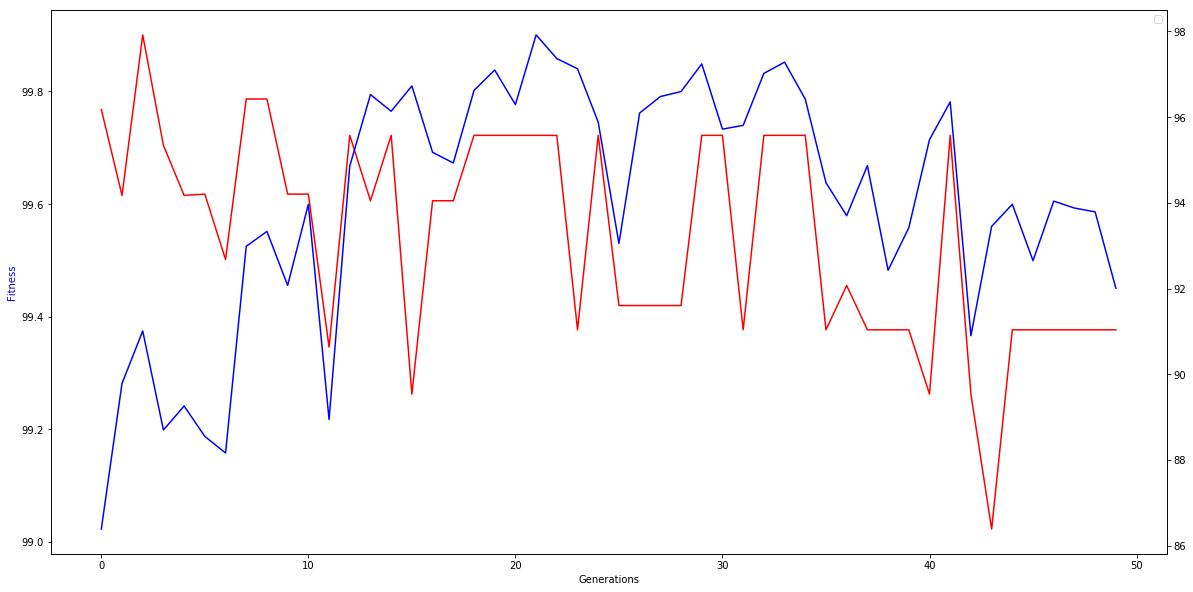

In [98]:
# Run algorithm again with the included statistics
pop, logbook = GA_ALG1(0.5,0.2,50,50,stats)
# Get statistics from the logbook (defined ealier keys can be used)
gen, avg, std, Min, Max = logbook.select('gen','avg','std','min','max');
# Import library for ploting results
import matplotlib.pyplot as plt
# Create figure (fig) and axes (ax1)
fig, ax1 = plt.subplots()
# Define width and height of the plot
fig.set_figwidth(20)
fig.set_figheight(10)
# Plot max value of the fitness function (best solutions)
line1 = ax1.plot(gen, Max, "r-")
ax1.legend()
# Create next axis and plot average value of the fitness function
ax2 = ax1.twinx()
line2 = ax2.plot(gen, avg, "b-")
# Set labels for the axis
ax1.set_xlabel("Generations")
ax1.set_ylabel("Fitness", color="b")
# Plot results
plt.show()